In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

Función para graficar fronteras de decisión

In [9]:
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel(wine.feature_names[0])
    ax.set_ylabel(wine.feature_names[1])
    legend1 = ax.legend(*scatter.legend_elements(), title="Clases")
    ax.add_artist(legend1)

---

Cargamos el dataset de vinos

In [10]:
wine = load_wine()
X = wine.data[:, :2]  # Seleccionamos solo las dos primeras características para visualizar
y = wine.target  # Clases de vino

Dividimos en conjuntos de entrenamiento y prueba

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Ajustamos modelos LDA y QDA

In [12]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [13]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

Graficamos

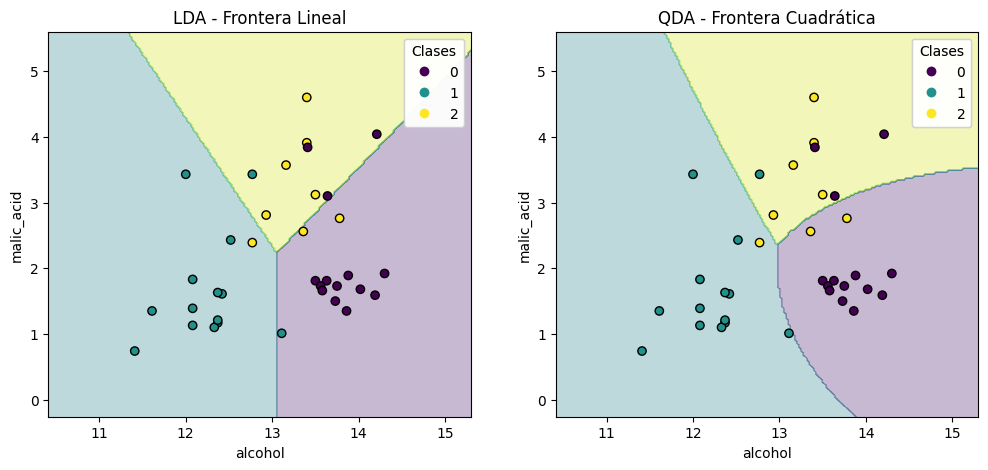

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundary(lda, X_test, y_test, axes[0], "LDA - Frontera Lineal")
plot_decision_boundary(qda, X_test, y_test, axes[1], "QDA - Frontera Cuadrática")
plt.show()